# PDS09 Project 02 #
* Dataset Marging
* Data Manipulation
* K-Means Clustering

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df1 = pd.read_csv('term-test-1-result.csv')
df2 = pd.read_csv('term-test-2-result.csv')

df = pd.merge(df1, df2, on=['Registration Number', 'Name'])
df.head()

,Registration Number,Name,TT-1 Marks,TT-2 Marks
0,2020338001,Susan Flores,8,9
1,2020338002,April Burns,20,9
2,2020338003,Suzanne Harrington,20,8
3,2020338004,Lindsay Walker,18,16
4,2020338005,Jose Bennett,10,19


In [21]:
df['Best One'] = df[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)
df['Average'] = df[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)

df.head()

,Registration Number,Name,TT-1 Marks,TT-2 Marks,Best One,Average
0,2020338001,Susan Flores,8,9,9,8.5
1,2020338002,April Burns,20,9,20,14.5
2,2020338003,Suzanne Harrington,20,8,20,14.0
3,2020338004,Lindsay Walker,18,16,18,17.0
4,2020338005,Jose Bennett,10,19,19,14.5


In [22]:
df.drop(columns=['TT-1 Marks', 'TT-2 Marks'], inplace=True)
df.head()

,Registration Number,Name,Best One,Average
0,2020338001,Susan Flores,9,8.5
1,2020338002,April Burns,20,14.5
2,2020338003,Suzanne Harrington,20,14.0
3,2020338004,Lindsay Walker,18,17.0
4,2020338005,Jose Bennett,19,14.5


In [23]:
tt_df = pd.read_csv('termfinal-and-attendance.csv')

tt_df.head()

,Registration Number,Name,Attendance Marks,Term-Final Marks
0,2020338001,Susan Flores,9,78
1,2020338002,April Burns,10,82
2,2020338003,Suzanne Harrington,4,47
3,2020338004,Lindsay Walker,6,47
4,2020338005,Jose Bennett,2,83


In [24]:
final_df = pd.merge(df, tt_df, on=['Registration Number', 'Name'])
final_df.head()

,Registration Number,Name,Best One,Average,Attendance Marks,Term-Final Marks
0,2020338001,Susan Flores,9,8.5,9,78
1,2020338002,April Burns,20,14.5,10,82
2,2020338003,Suzanne Harrington,20,14.0,4,47
3,2020338004,Lindsay Walker,18,17.0,6,47
4,2020338005,Jose Bennett,19,14.5,2,83


In [25]:
final_df['Final Marks'] = (final_df['Term-Final Marks'] * 0.7 + final_df['Average'] + final_df['Attendance Marks']).round(2)

final_df.head()

,Registration Number,Name,Best One,Average,Attendance Marks,Term-Final Marks,Final Marks
0,2020338001,Susan Flores,9,8.5,9,78,72.1
1,2020338002,April Burns,20,14.5,10,82,81.9
2,2020338003,Suzanne Harrington,20,14.0,4,47,50.9
3,2020338004,Lindsay Walker,18,17.0,6,47,55.9
4,2020338005,Jose Bennett,19,14.5,2,83,74.6


In [26]:
final_df.to_csv('final result.csv')

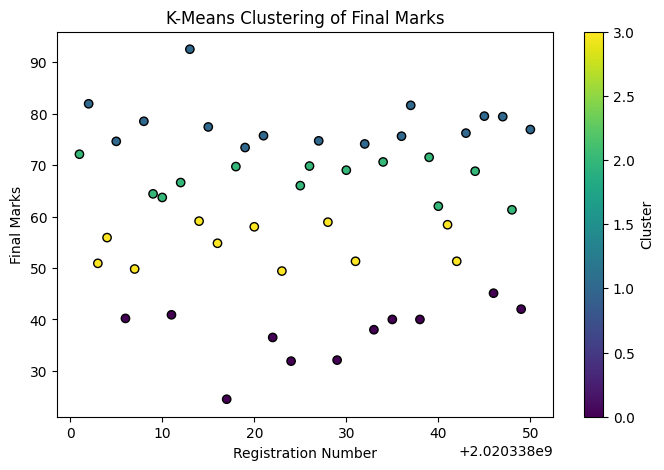

   Registration Number                Name  Best One  Average  \
0           2020338001        Susan Flores         9      8.5   
1           2020338002         April Burns        20     14.5   
2           2020338003  Suzanne Harrington        20     14.0   
3           2020338004      Lindsay Walker        18     17.0   
4           2020338005        Jose Bennett        19     14.5   

   Attendance Marks  Term-Final Marks  Final Marks  Cluster  
0                 9                78         72.1        2  
1                10                82         81.9        1  
2                 4                47         50.9        3  
3                 6                47         55.9        3  
4                 2                83         74.6        1  


In [27]:
# Apply K-Means clustering
from sklearn.cluster import KMeans


X = final_df[['Final Marks']].values
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
final_df['Cluster'] = kmeans.fit_predict(X)

# Visualizing Clusters
plt.figure(figsize=(8, 5))
plt.scatter(final_df['Registration Number'], final_df['Final Marks'], c=final_df['Cluster'], cmap='viridis', edgecolors='k')
plt.xlabel('Registration Number')
plt.ylabel('Final Marks')
plt.title('K-Means Clustering of Final Marks')
plt.colorbar(label='Cluster')
# plt.xticks(rotation=90)
plt.show()

print(final_df.head())